In [32]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [2]:
df = pd.read_csv("Taxi_Trips.csv")

In [3]:
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,3f0bf7494f9cd6326e9fa851a8047dc50aec83ae,b56b31883524426035c290bfdbe4e038baccc814842c10...,03/01/2022 12:00:00 AM,03/01/2022 12:00:00 AM,512.0,4.16,NaN,NaN,NaN,58.0,...,5.5,22.80,Mobile,Sun Taxi,NaN,NaN,NaN,41.817366,-87.698861,POINT (-87.6988607973 41.8173662079)
1,67dcefca7b0a902921097521c6d8224e2e207684,fea1ad3b44e1a049eb5b1f33d9c53ddd6cae02b095b6a1...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,720.0,0.30,NaN,NaN,76.0,76.0,...,5.5,21.25,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.980264,-87.913625,POINT (-87.913624596 41.9802643146)
2,0072059e89f7b98b5467d64998838e917adfc265,9b954fdb175c1546d40a6e75f670f2d5f25b49a5adb4de...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,1440.0,17.00,NaN,NaN,56.0,22.0,...,4.0,52.30,Credit Card,U Taxicab,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205)
3,047231aaad82c374c6d5be3769d3985e1017ca90,cb3bd991c2f7932527ef9d5f341674dfba53745f25fe3e...,03/01/2022 12:00:00 AM,03/01/2022 12:00:00 AM,60.0,0.00,NaN,NaN,76.0,76.0,...,0.0,3.25,Cash,Blue Ribbon Taxi Association Inc.,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.980264,-87.913625,POINT (-87.913624596 41.9802643146)
4,0b8b0cdf25fee4bc673f5380aba551c241f253dd,73c53bd1d015d25541aa53570b7f1dd2227cf25b2bed0c...,03/01/2022 12:00:00 AM,03/01/2022 12:00:00 AM,60.0,0.00,NaN,NaN,24.0,24.0,...,0.5,4.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499420,e3a7aed21d510c69d7cc7e576b09d838e05d820e,e533bfdc483206f9c02c1c879a118d88f0a3ca1cd2703f...,03/31/2022 12:00:00 AM,03/31/2022 12:15:00 AM,785.0,6.33,NaN,NaN,76.0,NaN,...,5.0,22.75,Cash,Flash Cab,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
499421,e88250b075b03336cacf9c25e281fc849547059f,a39edfa6e2ec6209ece046221d25bdb4c4fee327de239a...,03/31/2022 12:00:00 AM,03/31/2022 12:15:00 AM,851.0,7.55,NaN,NaN,6.0,32.0,...,0.0,24.81,Mobile,Sun Taxi,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
499422,d3dda6441ff245a2ae65b3ed4aa2117a7b6042d6,8b1a88e5a09cfd55ca72d267f00f56fa50a42aa322bdfe...,03/31/2022 12:00:00 AM,03/31/2022 12:15:00 AM,423.0,3.43,NaN,NaN,3.0,6.0,...,0.0,11.00,Cash,Flash Cab,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
499423,dac41e93cda822d08f66504042f7bf6ac19ce607,74102c0c2128df140aa219be695337041f4352aaa50cc9...,03/31/2022 12:00:00 AM,03/31/2022 12:30:00 AM,1461.0,10.43,NaN,NaN,68.0,33.0,...,0.0,28.50,Prcard,City Service,41.777196,-87.642498,POINT (-87.6424975271 41.7771962546),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585)


In [4]:
df = df[df['Pickup Centroid Location'].notna()]
df = df[df['Trip Total'].notna()]
df = df[df['Pickup Census Tract'].notna()]
df = df[df['Dropoff Census Tract'].notna()]
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
24,105a003bee58d83030859a0509edc243c26d2773,a1322b6e2287841b33658ac21ce329b9020e69cbe75bf0...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,240.0,0.00,1.703198e+10,1.703198e+10,76.0,76.0,...,0.0,3.25,Cash,Top Cab Affiliation,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
30,4fa56fcab6d965ee7127c797e6b426e4dc80a9ec,3618045f9110d4d88482266ade23659c1a50d32ac37f20...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,480.0,3.60,1.703198e+10,1.703177e+10,76.0,76.0,...,5.0,21.05,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),42.005560,-87.901886,POINT (-87.901885838 42.0055597639)
40,ea4cb9dc7312cb2ef0e14b244dceadd69a10ba78,fea1ad3b44e1a049eb5b1f33d9c53ddd6cae02b095b6a1...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,720.0,0.30,1.703198e+10,1.703177e+10,76.0,76.0,...,5.5,21.25,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),42.005560,-87.901886,POINT (-87.901885838 42.0055597639)
84,8ff64828c8b28feb555eb31383aa004877897692,137d4f780c3823fdc5f26cec160a8c9f8eb952f769c5bc...,03/01/2022 12:15:00 AM,03/01/2022 12:15:00 AM,162.0,0.17,1.703198e+10,1.703198e+10,76.0,76.0,...,4.0,69.50,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
87,979a1f89622ed3f554e29d60d2e0c709b834db79,624a6a680c34b514659e430a8c859b763e61c2cd9f0e2f...,03/01/2022 12:15:00 AM,03/01/2022 12:45:00 AM,1762.0,24.00,1.703198e+10,1.703133e+10,76.0,33.0,...,4.0,62.00,Cash,Chicago Independents,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499350,dc423f7b962afd9f4926a25f939ad98f6a76f87b,8b1a88e5a09cfd55ca72d267f00f56fa50a42aa322bdfe...,03/30/2022 11:45:00 PM,03/30/2022 11:45:00 PM,659.0,6.60,1.703108e+10,1.703103e+10,8.0,77.0,...,0.0,18.25,Cash,Flash Cab,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),41.978875,-87.657871,POINT (-87.6578712629 41.9788750584)
499357,f431a65628a4ae47e7ecc9130f0b3129dcaad4b4,78893d83a12762723e5a8ef770b3fb541e9b2cd8d4316d...,03/30/2022 11:45:00 PM,03/30/2022 11:45:00 PM,540.0,2.70,1.703198e+10,1.703177e+10,76.0,NaN,...,4.0,14.00,Cash,Choice Taxi Association,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.982775,-87.877305,POINT (-87.8773053996 41.9827750091)
499374,96310530bf2657d1b3286e79163b4b817b1554dd,0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...,03/31/2022 12:00:00 AM,03/31/2022 12:00:00 AM,180.0,0.00,1.703184e+10,1.703133e+10,28.0,33.0,...,0.0,5.50,Cash,Taxi Affiliation Services,41.867902,-87.642959,POINT (-87.6429586652 41.8679024175),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
499385,c4935ce4383ba9885ccc189e3120fe9839704b3a,ad0ad3b00e143317e02602396f16dde8fd30faefd491d6...,03/31/2022 12:00:00 AM,03/31/2022 12:15:00 AM,1456.0,17.94,1.703198e+10,1.703184e+10,76.0,32.0,...,4.5,59.10,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [6]:
# print(df['Trip Total'].max())
df = df.loc[(df['Trip Total'] >= 3.25) & (df['Trip Total'] <= 50.0)]

In [18]:
count = df['Trip Total'].value_counts()
print(count)

3.25     6131
8.00     4039
9.84     3766
9.00     3693
7.75     3408
         ... 
49.09       1
24.88       1
26.88       1
32.32       1
6.40        1
Name: Trip Total, Length: 2460, dtype: int64


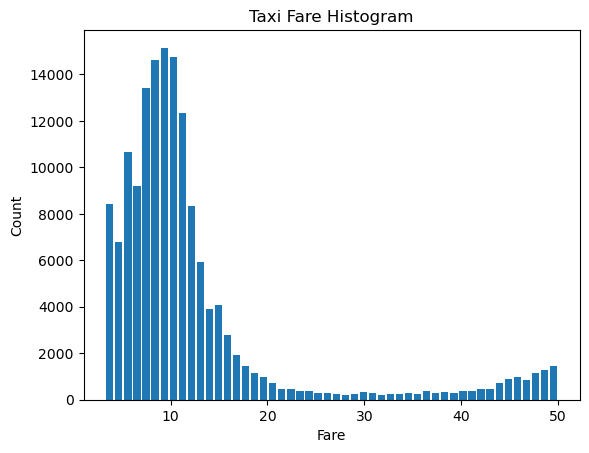

In [26]:
plt.figure()
plt.title('Taxi Fare Histogram')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.hist(df['Trip Total'], bins=50, rwidth=0.8)
plt.show()

In [27]:
zipfile = "Zip Codes.zip"
chicago = gpd.read_file(zipfile)

In [28]:
chicago

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


<AxesSubplot:>

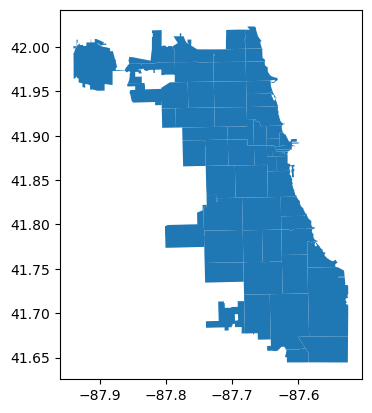

In [29]:
chicago.plot()

<AxesSubplot:>

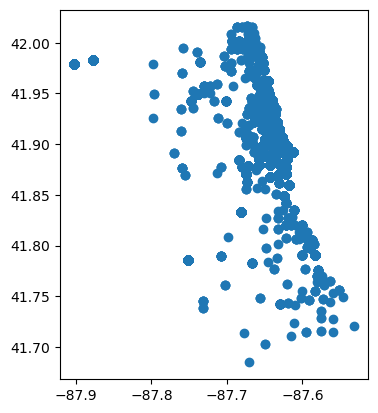

In [40]:
geometry = [Point(xy) for xy in zip(df['Pickup Centroid Longitude'], df['Pickup Centroid Latitude'])]

gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)

gdf.plot()

In [47]:
gdf = gdf.to_crs("EPSG:3395")

In [48]:
gdf['centroid'] = gdf.centroid

In [50]:
gdf.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,geometry,centroid
24,105a003bee58d83030859a0509edc243c26d2773,a1322b6e2287841b33658ac21ce329b9020e69cbe75bf0...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,240.0,0.0,1.703198e+10,1.703198e+10,76.0,76.0,...,Cash,Top Cab Affiliation,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),POINT (-9785321.614 5129257.581),POINT (-9785321.614 5129257.581)
30,4fa56fcab6d965ee7127c797e6b426e4dc80a9ec,3618045f9110d4d88482266ade23659c1a50d32ac37f20...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,480.0,3.6,1.703198e+10,1.703177e+10,76.0,76.0,...,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),42.005560,-87.901886,POINT (-87.901885838 42.0055597639),POINT (-9785321.614 5129257.581),POINT (-9785321.614 5129257.581)
40,ea4cb9dc7312cb2ef0e14b244dceadd69a10ba78,fea1ad3b44e1a049eb5b1f33d9c53ddd6cae02b095b6a1...,03/01/2022 12:00:00 AM,03/01/2022 12:15:00 AM,720.0,0.3,1.703198e+10,1.703177e+10,76.0,76.0,...,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),42.005560,-87.901886,POINT (-87.901885838 42.0055597639),POINT (-9785321.614 5129257.581),POINT (-9785321.614 5129257.581)
88,a2015449b7e303ee821696f841036659aff5b878,3f46ef398d3308fb9794b8c5de450a88439d16c47b77b7...,03/01/2022 12:15:00 AM,03/01/2022 12:15:00 AM,18.0,0.0,1.703198e+10,1.703198e+10,76.0,76.0,...,Cash,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),POINT (-9785321.614 5129257.581),POINT (-9785321.614 5129257.581)
105,ec153319872653eee8324d00eb2504fd8f5b9bc0,f5cbc985c44eccd8aaab230d252a78e7e3e50f71a4909b...,03/01/2022 12:15:00 AM,03/01/2022 12:45:00 AM,1041.0,11.0,1.703198e+10,1.703133e+10,56.0,33.0,...,Credit Card,Globe Taxi,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.859350,-87.617358,POINT (-87.6173580061 41.859349715),POINT (-9768389.322 5100496.922),POINT (-9768389.322 5100496.922)


In [51]:
chicago = chicago.to_crs('EPSG:3395')
chicago['centroid'] = chicago.centroid
chicago.head()

,objectid,shape_area,shape_len,zip,geometry,centroid
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-9760228.181 5120114.708, -9760226.5...",POINT (-9762970.793 5120612.666)
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-9765706.326 5120843.341, -9765717.1...",POINT (-9768952.754 5120516.962)
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-9772181.764 5118831.519, -9772215.9...",POINT (-9773376.820 5120441.231)
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-9759053.446 5115807.386, -9759053.4...",POINT (-9760961.778 5117934.276)
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-9763449.188 5116805.817, -9763467.4...",POINT (-9767292.437 5117827.555)


In [66]:
result = gpd.sjoin(gdf, chicago, op='within').groupby('zip').count()

In [67]:
result.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,geometry,centroid_left,index_right,objectid,shape_area,shape_len,centroid_right
zip,,,,,,,,,,,,,,,,,,,,,
60601,20171,20171,20171,20171,20170,20171,20171,20171,20171,20160,...,20170,20170,20170,20171,20171,20171,20171,20171,20171,20171
60603,22137,22137,22137,22137,22137,22137,22137,22137,22137,22128,...,22137,22137,22137,22137,22137,22137,22137,22137,22137,22137
60604,4278,4278,4278,4278,4278,4278,4278,4278,4278,4276,...,4277,4277,4277,4278,4278,4278,4278,4278,4278,4278
60605,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,...,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172
60607,2236,2236,2236,2236,2235,2236,2236,2236,2236,2235,...,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236


In [68]:
# result.groupby('zip').count()

result = result.filter(['geometry'])
result = result.rename(columns={'geometry':'count'})

result

,count
zip,
60601,20171
60603,22137
60604,4278
60605,4172
60607,2236
60608,354
60609,11
60610,4616
60611,39409


In [69]:
merged = pd.merge(result, chicago, right_on='zip', left_index=True)

<AxesSubplot:>

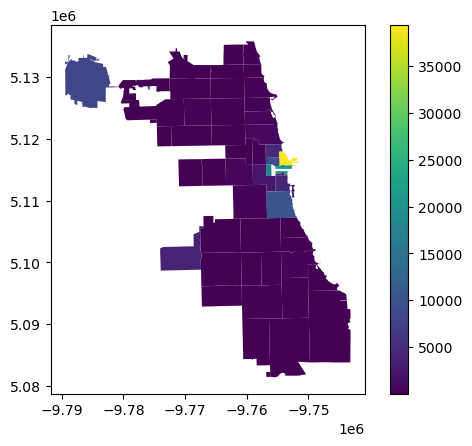

In [70]:
merged = merged.set_geometry('geometry')

merged.plot('count', legend=True)